<a href="https://colab.research.google.com/github/guebin/DL2024/blob/main/posts/03wk-2.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

{{<video https://youtu.be/playlist?list=PLQqh36zP38-y4BW27vnVa08AtMixu1IwL&si=v_BjoNGj2eVBht3Z >}}

# 2. Imports

In [2]:
import torch
import matplotlib.pyplot as plt 
import pandas as pd

# 3. 꺽인그래프를 만드는 방법 

`-` 로지스틱의 한계를 극복하기 위해서는 시그모이드를 취하기 전에 꺽인 그래프 모양을 만드는 기술이 있어야겠음. 

`-` 아래와 같은 벡터 ${\boldsymbol x}$를 가정하자. 

In [3]:
x = torch.linspace(-1,1,1001).reshape(-1,1)
x

tensor([[-1.0000],
        [-0.9980],
        [-0.9960],
        ...,
        [ 0.9960],
        [ 0.9980],
        [ 1.0000]])

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#print(device)
x_gpu=x.to(device)

`-` 목표: 아래와 같은 벡터 ${\boldsymbol y}$를 만들어보자.

$${\boldsymbol y} = [y_1,y_2,\dots,y_{n}], \quad y_i = \begin{cases} 9x_i +4.5& x_i <0 \\ -4.5x_i + 4.5& x_i >0 \end{cases}$$

## A. 방법1

In [3]:
y = x*0     # 0으로 초기화
y[x<0] = (9*x+4.5)[x<0]
y[x>0] = (-4.5*x+4.5)[x>0]

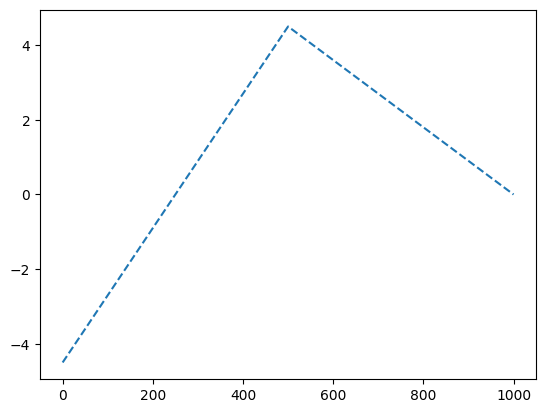

In [4]:
plt.plot(y,'--')


::: {.callout-note}


강의영상에 보셨듯이 아래의 코드실행결과는 다르게 나옵니다. 

```Python
## 아래를 실행하면 꺽인선이 나오는데용...
x = torch.linspace(-1,1,1001).reshape(-1,1)
y = x*0 + x 
y[x<0] = (9*x+4.5)[x<0]
y[x>0] = (-4.5*x+4.5)[x>0]
plt.plot(x,y)
```

```Python
## 이걸 실행하면 그냥 직선이 나옵니다...
x = torch.linspace(-1,1,1001).reshape(-1,1)
y = x 
y[x<0] = (9*x+4.5)[x<0]
y[x>0] = (-4.5*x+4.5)[x>0]
plt.plot(x,y)
```

다르게 나오는 이유가 너무 궁금하시다면 아래의 링크로 가셔서 깊은복사/얕은복사에 대한 개념을 이해하시면 됩니다. (그렇지만 가능하다면 궁금해하지 마세요.....)

- [깊은복사 얕은복사 강의들으러 가기](https://guebin.github.io/PP2023/posts/2023-06-21-13wk-1.html)


:::



## B. 방법2 -- 렐루이용 

In [5]:
relu = torch.nn.ReLU()

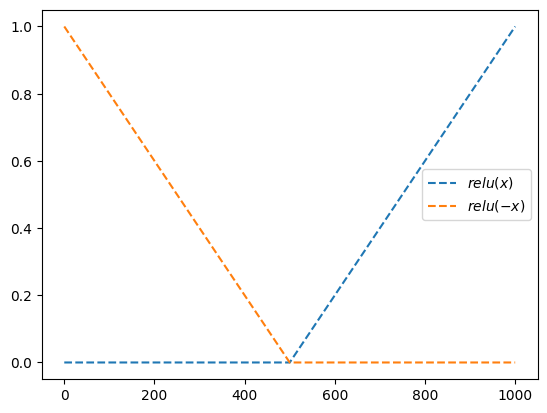

In [6]:
plt.plot(relu(x),'--',label=r'$relu(x)$')
plt.plot(relu(-x),'--',label=r'$relu(-x)$')
plt.legend()

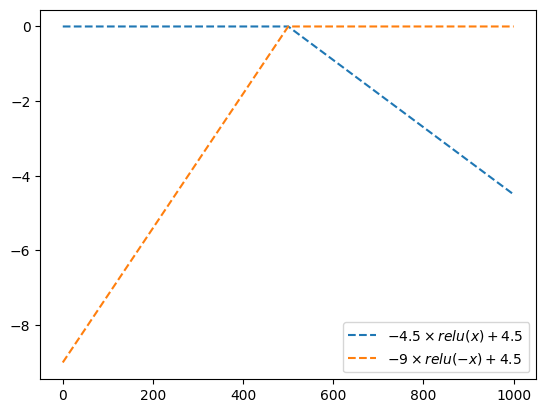

In [7]:
plt.plot(-4.5*relu(x),'--',label=r'$-4.5\times relu(x) + 4.5$')
plt.plot(-9*relu(-x),'--',label=r'$-9\times relu(-x) + 4.5$')
plt.legend()

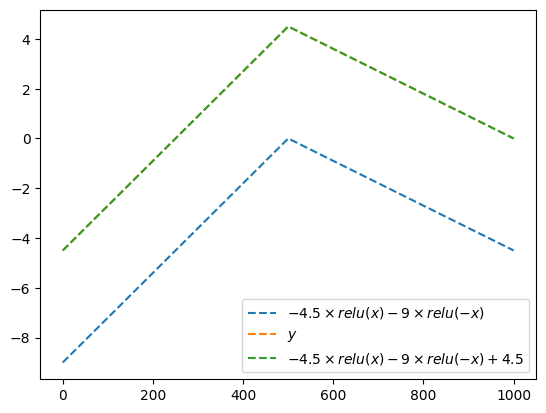

In [8]:
plt.plot(-4.5*relu(x)-9*relu(-x),'--',label=r'$-4.5\times relu(x) -9 \times relu(-x)$')
plt.plot(y,'--',label=r'$y$')
plt.plot(-4.5*relu(x)-9*relu(-x)+4.5,'--',label=r'$-4.5\times relu(x) -9 \times relu(-x)+4.5$')
plt.legend()

`-` 우리의 목표: 저 초록선에서 시그모이드를 태우면된다. 즉 아래의 느낌임 

In [9]:
sig = torch.nn.Sigmoid()

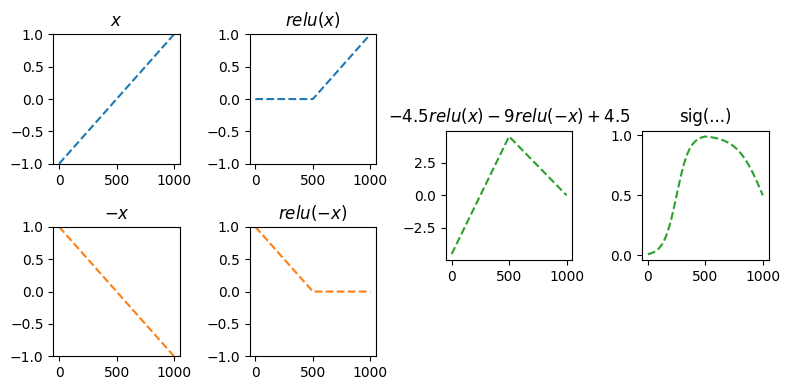

In [10]:
fig = plt.figure(figsize=(8, 4))
spec = fig.add_gridspec(4, 4)
ax1 = fig.add_subplot(spec[:2,0]); ax1.set_title(r'$x$'); ax1.set_ylim(-1,1)
ax2 = fig.add_subplot(spec[2:,0]); ax2.set_title(r'$-x$'); ax2.set_ylim(-1,1)
ax3 = fig.add_subplot(spec[:2,1]); ax3.set_title(r'$relu(x)$'); ax3.set_ylim(-1,1)
ax4 = fig.add_subplot(spec[2:,1]); ax4.set_title(r'$relu(-x)$'); ax4.set_ylim(-1,1)
ax5 = fig.add_subplot(spec[1:3,2]); ax5.set_title(r'$-4.5 relu(x)-9 relu(-x)+4.5$')
ax6 = fig.add_subplot(spec[1:3,3]); ax6.set_title('sig(...)');
#---#
ax1.plot(x,'--',color='C0')
ax2.plot(-x,'--',color='C1')
ax3.plot(relu(x),'--',color='C0')
ax4.plot(relu(-x),'--',color='C1')
ax5.plot(-4.5*relu(x)-9*relu(-x)+4.5,'--',color='C2')
ax6.plot(sig(-4.5*relu(x)-9*relu(-x)+4.5),'--',color='C2')
fig.tight_layout()

## C. 방법2의 다른구현  

`-` 렐루이용하여 만드는 방법 정리 

1. 벡터 x와 relu함수를 준비한다.
2. u = [x,-x] 를 계산한다. 
3. v = [relu(x), relu(-x)] 를 계산한다. 
4. y = -4.5 * relu(x) + 9 * relu(-x) +4.5 를 계산한다. 

`-` 1단계

In [11]:
x,relu

(tensor([[-1.0000],
         [-0.9980],
         [-0.9960],
         ...,
         [ 0.9960],
         [ 0.9980],
         [ 1.0000]]),
 ReLU())

`-` 2단계 

In [12]:
u = torch.concat([x,-x],axis=1) # u = [x, -x] 같은것
u

tensor([[-1.0000,  1.0000],
        [-0.9980,  0.9980],
        [-0.9960,  0.9960],
        ...,
        [ 0.9960, -0.9960],
        [ 0.9980, -0.9980],
        [ 1.0000, -1.0000]])

`-` 3단계

In [13]:
v = relu(u) # 각각의 column에 렐루취함
v,v.shape

(tensor([[0.0000, 1.0000],
         [0.0000, 0.9980],
         [0.0000, 0.9960],
         ...,
         [0.9960, 0.0000],
         [0.9980, 0.0000],
         [1.0000, 0.0000]]),
 torch.Size([1001, 2]))

`-` 4단계 

In [14]:
v[:,[0]]     # v의 첫번째 열을 slicing하는 방법
v[:,[0]].shape

torch.Size([1001, 1])

In [15]:
-4.5 * v[:,[0]] - 9.0 * v[:,[1]] +4.5   # 첫 번째 열과 ,두 번째 열에 각각 선형변환한걸 서로 합침

tensor([[-4.5000],
        [-4.4820],
        [-4.4640],
        ...,
        [ 0.0180],
        [ 0.0090],
        [ 0.0000]])

In [16]:
y, y.shape

(tensor([[-4.5000],
         [-4.4820],
         [-4.4640],
         ...,
         [ 0.0180],
         [ 0.0090],
         [ 0.0000]]),
 torch.Size([1001, 1]))

`-` 그런데, 4단계는 아래와 같이 볼 수 있다. 

- ${\boldsymbol v}\begin{bmatrix} -4.5 \\ -9.0 \end{bmatrix} + 4.5 = \begin{bmatrix} 
v_{11} & v_{12}  \\ 
v_{21} & v_{22}  \\ 
\dots & \dots  \\ 
v_{n1} & v_{n2}  \\ 
\end{bmatrix}\begin{bmatrix} -4.5 \\ -9.0 \end{bmatrix} + 4.5 = 
\begin{bmatrix} 
-4.5 v_{11} - 9.0 v_{12} + 4.5  \\ 
-4.5 v_{21} - 9.0 v_{22} + 4.5  \\ 
\dots \\ 
-4.5 v_{n1} - 9.0 v_{n2} + 4.5 \\ 
\end{bmatrix}$

위의 수식을 참고하여 매트릭스의 곱 형태로 다시 포현하면 아래와 같다. 

In [17]:
What = torch.tensor([[-4.5],[9.0]])
v@What+4.5

tensor([[1.3500e+01],
        [1.3482e+01],
        [1.3464e+01],
        ...,
        [1.8000e-02],
        [8.9998e-03],
        [0.0000e+00]])

In [18]:
#-4.5 * v[:,[0]] - 9.0 * v[:,[1]] +4.5
What = torch.tensor([[-4.5],[-9.0]]) 
v @ What + 4.5 

tensor([[-4.5000],
        [-4.4820],
        [-4.4640],
        ...,
        [ 0.0180],
        [ 0.0090],
        [ 0.0000]])

이제 매트릭스의 곱 대신에 `torch.nn.Linear()`를 이용하면 아래의 코드와 같아진다. 

In [19]:
l2 = torch.nn.Linear(
    in_features=2,
    out_features=1 
    # bias = true
)

In [20]:
l2.weight.data = torch.tensor([[-4.5,-9.0]])
l2.bias.data = torch.tensor([4.5])

In [21]:
l2(v)

tensor([[-4.5000],
        [-4.4820],
        [-4.4640],
        ...,
        [ 0.0180],
        [ 0.0090],
        [ 0.0000]], grad_fn=<AddmmBackward0>)

In [22]:
print(v.shape)
print(l2(v).shape)

torch.Size([1001, 2])
torch.Size([1001, 1])


`-` 사실 2단계도 아래와 같이 볼 수 있다. 

$$\begin{bmatrix}
x_1 \\
x_2 \\
\dots \\ 
x_n 
\end{bmatrix}\begin{bmatrix} 1 & -1 \end{bmatrix} = \begin{bmatrix} x_1 & -x_1 \\ x_2 & -x_2 \\ \dots & \dots \\ x_n & -x_n \end{bmatrix}$$

In [23]:
#u = torch.concat([x,-x],axis=1) # u1 = [x, -x] 같은것

In [24]:
l1 = torch.nn.Linear(1,2)
l1.weight.data = torch.tensor([[1.0],[-1.0]])
l1.bias.data = torch.tensor([0.0,0.0])

In [25]:
l1(x)

tensor([[-1.0000,  1.0000],
        [-0.9980,  0.9980],
        [-0.9960,  0.9960],
        ...,
        [ 0.9960, -0.9960],
        [ 0.9980, -0.9980],
        [ 1.0000, -1.0000]], grad_fn=<AddmmBackward0>)

`-` 따라서 `torch.nn` 에 포함된 레이어를 이용하면 아래와 같이 표현할 할 수 있다. 

In [26]:
l1 = torch.nn.Linear(1,2)
l1.weight.data = torch.tensor([[1.0],[-1.0]])
l1.bias.data = torch.tensor([0.0,0.0])
a1 = torch.nn.ReLU()
l2 = torch.nn.Linear(2,1)
l2.weight.data = torch.tensor([[-4.5,-9.0]])
l2.bias.data = torch.tensor([4.5])

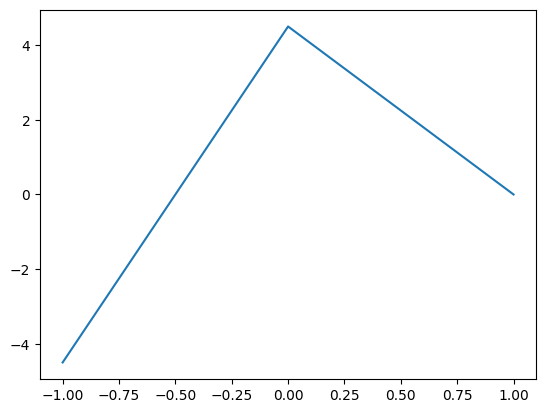

In [27]:
plt.plot(x,l2(a1(l1(x))).data)

In [28]:
l2(a1(l1(x))) == y # 서로 똑같아

tensor([[True],
        [True],
        [True],
        ...,
        [True],
        [True],
        [True]])

`-` 각각의 layer를 `torch.nn.Sequential()` 로 묶으면 아래와 같이 정리할 수 있다. 

In [29]:
net = torch.nn.Sequential(
    torch.nn.Linear(1,2),
    torch.nn.ReLU(),
    torch.nn.Linear(2,1)
)
l1,a1,l2 = net
# net.weight.data 의 차원은 (out_features,in_features)
l1.weight.data = torch.tensor([[1.0],[-1.0]])  # l1 의 weigh.data의 차원은 2x1
l1.bias.data = torch.tensor([0.0,0.0])
l2.weight.data = torch.tensor([[-4.5,-9.0]])   # l2 의 weigh.data의 차원은 1x2
l2.bias.data = torch.tensor([4.5])

In [30]:
net(x)==y    # 서로 같다

tensor([[True],
        [True],
        [True],
        ...,
        [True],
        [True],
        [True]])

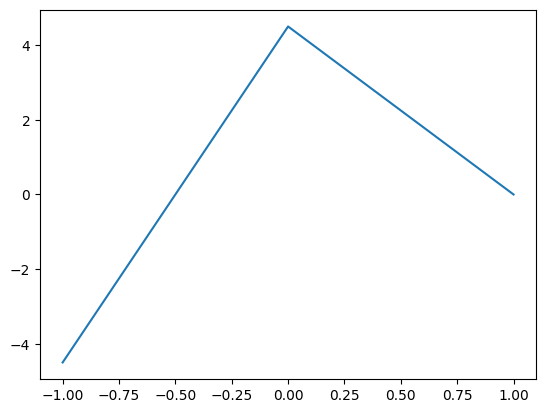

In [31]:
plt.plot(x,net(x).data)

## D. 수식표현

`(1)` ${\bf X}=\begin{bmatrix} x_1 \\ \dots \\ x_n \end{bmatrix}$

`(2)`
$l_1({\bf X})={\bf X}{\bf W}^{(1)}\overset{bc}{+} {\boldsymbol b}^{(1)}=\begin{bmatrix} x_1 & -x_1 \\ x_2 & -x_2 \\ \dots & \dots \\ x_n & -x_n\end{bmatrix}$

-   ${\bf W}^{(1)}=\begin{bmatrix} 1 & -1 \end{bmatrix}$
-   ${\boldsymbol b}^{(1)}=\begin{bmatrix} 0 & 0 \end{bmatrix}$

`(3)`
$(a_1\circ l_1)({\bf X})=\text{relu}\big({\bf X}{\bf W}^{(1)}\overset{bc}{+}{\boldsymbol b}^{(1)}\big)=\begin{bmatrix} \text{relu}(x_1) & \text{relu}(-x_1) \\ \text{relu}(x_2) & \text{relu}(-x_2) \\ \dots & \dots \\ \text{relu}(x_n) & \text{relu}(-x_n)\end{bmatrix}$

`(4)`
$(l_2 \circ a_1\circ l_1)({\bf X})=\text{relu}\big({\bf X}{\bf W}^{(1)}\overset{bc}{+}{\boldsymbol b}^{(1)}\big){\bf W}^{(2)}\overset{bc}{+}b^{(2)}$

$\quad=\begin{bmatrix} -4.5\times\text{relu}(x_1) -9.0 \times \text{relu}(-x_1) +4.5 \\ -4.5\times\text{relu}(x_2) -9.0 \times\text{relu}(-x_2) + 4.5 \\ \dots \\ -4.5\times \text{relu}(x_n) -9.0 \times\text{relu}(-x_n)+4.5 \end{bmatrix}$

-   ${\bf W}^{(2)}=\begin{bmatrix} -4.5 \\ -9 \end{bmatrix}$
-   $b^{(2)}=4.5$

`(5)`
$net({\bf X})=(l_2 \circ a_1\circ l_1)({\bf X})=\text{relu}\big({\bf X}{\bf W}^{(1)}\overset{bc}{+}{\boldsymbol b}^{(1)}\big){\bf W}^{(2)}\overset{bc}{+}b^{(2)}$

$\quad =\begin{bmatrix} -4.5\times\text{relu}(x_1) -9.0 \times \text{relu}(-x_1) +4.5 \\ -4.5\times\text{relu}(x_2) -9.0 \times\text{relu}(-x_2) + 4.5 \\ \dots \\ -4.5\times \text{relu}(x_n) -9.0 \times\text{relu}(-x_n)+4.5 \end{bmatrix}$

# 4. 로지스틱의 한계 극복

## A. 데이터 

In [32]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DL2024/main/posts/dnnex.csv")
df

,x,prob,y
0,-1.000000,0.000045,0.0
1,-0.998999,0.000046,0.0
2,-0.997999,0.000047,0.0
3,-0.996998,0.000047,0.0
4,-0.995998,0.000048,0.0
...,...,...,...
1995,0.995998,0.505002,0.0
1996,0.996998,0.503752,0.0
1997,0.997999,0.502501,0.0
1998,0.998999,0.501251,1.0


In [33]:
x = torch.tensor(df.x).float().reshape(-1,1)
y = torch.tensor(df.y).float().reshape(-1,1)
prob = torch.tensor(df.prob).float().reshape(-1,1)

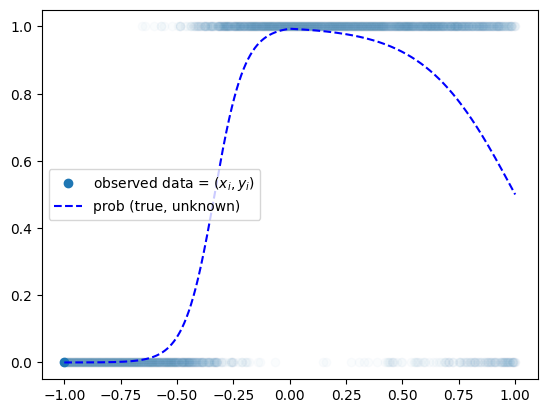

In [34]:
plt.plot(x,y,'o',alpha=0.02)
plt.plot(x[0],y[0],'o',label= r"observed data = $(x_i,y_i)$",color="C0")
plt.plot(x,prob,'--b',label= r"prob (true, unknown)")
plt.legend()

## B. Step 1~4

`-` Step1에 대한 생각: 네트워크를 어떻게 만들까? = 아키텍처를 어떻게 만들까? = 모델링 



$$\underset{(n,1)}{\bf X} \overset{l_1}{\to} \underset{(n,2)}{\boldsymbol u^{(1)}} \overset{a_1}{\to} \underset{(n,2)}{\boldsymbol v^{(1)}} \overset{l_1}{\to} \underset{(n,1)}{\boldsymbol u^{(2)}} \overset{a_2}{\to} \underset{(n,1)}{\boldsymbol v^{(2)}}=\underset{(n,1)}{\hat{\boldsymbol y}}$$

`-` Step2,3,4 는 너무 뻔해서..

In [35]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Linear(1,2),
    torch.nn.ReLU(),
    torch.nn.Linear(2,1),
    torch.nn.Sigmoid()
)
# list unpacking
l1,a1,l2,a2=net 

# initial value
l1.weight.data=torch.tensor([[1.0],[-1.0]])
l1.bias.data=torch.tensor([[0.0,0.0]])
l2.weight.data=torch.tensor([[-4.5,-9.0]])
l2.bias.data = torch.tensor([4.5])

# optimizer
optimizr = torch.optim.Adam(net.parameters(),lr=0.001)

# loss
loss_fn=torch.nn.BCELoss()
for epoc in range(3000):
    # step1 yhat
    yhat =net(x)
    # step2 loss
    loss = loss_fn(yhat,y)
    # step3 differntial
    loss.backward()
    # step4 update with optim
    optimizr.step()
    optimizr.zero_grad()

In [36]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Linear(1,2),
    torch.nn.ReLU(),
    torch.nn.Linear(2,1),
    torch.nn.Sigmoid()
)
loss_fn = torch.nn.BCELoss()
optimizr = torch.optim.Adam(net.parameters())
#---#
for epoc in range(3000):
    ## step 1
    yhat = net(x)
    ## step 2
    loss = loss_fn(yhat,y)
    ## step 3
    loss.backward()
    ## step 4
    optimizr.step()
    optimizr.zero_grad()

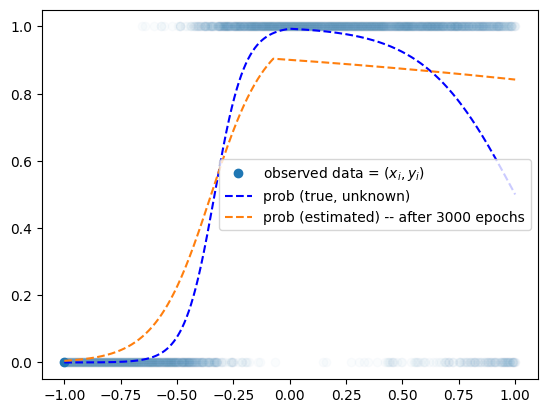

In [37]:
plt.plot(x,y,'o',alpha=0.02)
plt.plot(x[0],y[0],'o',label= r"observed data = $(x_i,y_i)$",color="C0")
plt.plot(x,prob,'--b',label= r"prob (true, unknown)")
plt.plot(x,net(x).data,'--',label="prob (estimated) -- after 3000 epochs")
plt.legend()

In [38]:
for epoc in range(3000):
    ## 
    yhat = net(x)
    ## 
    loss = loss_fn(yhat,y)
    ## 
    loss.backward()
    ## 
    optimizr.step()
    optimizr.zero_grad()

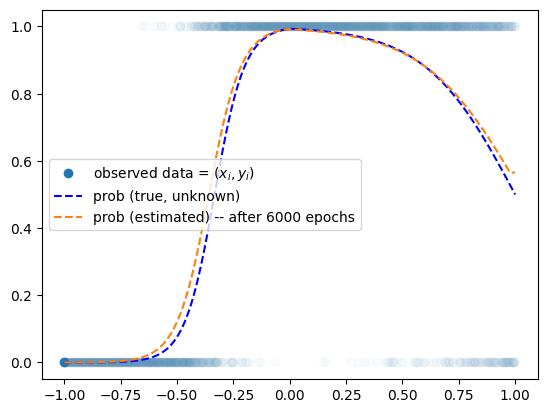

In [39]:
plt.plot(x,y,'o',alpha=0.02)
plt.plot(x[0],y[0],'o',label= r"observed data = $(x_i,y_i)$",color="C0")
plt.plot(x,prob,'--b',label= r"prob (true, unknown)")
plt.plot(x,net(x).data,'--',label="prob (estimated) -- after 6000 epochs")
plt.legend()